In [1]:
!pip install farasapy
!pip install bertopic[all]
!pip install Arabic-Stopwords
!pip install flair
!pip install gensim
!pip install arabic-reshaper python-bidi
!pip install pyLDAvis matplotlib






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic
from flair.embeddings import TransformerDocumentEmbeddings
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


In [3]:
from farasa.pos import FarasaPOSTagger
from farasa.ner import FarasaNamedEntityRecognizer
from farasa.diacratizer import FarasaDiacritizer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
import math
from collections import defaultdict
import arabicstopwords.arabicstopwords as stp
import gdown
import json
import umap
from umap import UMAP
import hdbscan
import re
from sentence_transformers import SentenceTransformer





/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
def segment(text):
    segmenter = FarasaSegmenter()
    segmented = segmenter.segment(text)
    return segmented

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
def stem(text):
    stemmer = FarasaStemmer()
    stemmed = stemmer.stem(text)
    return stemmed

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def tag(text):
    tagger = FarasaPOSTagger()
    tagged = tagger.tag(text)
    return tagged

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def recognize(text):
    named_entity_recognizer = FarasaNamedEntityRecognizer()
    named_entity_recognized = named_entity_recognizer.recognize(text)
    return named_entity_recognized

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:

# Load predefined Arabic stopwords

# Additional stopwords
extra_stopwords = [
    "ابتدى", "ابريل", "ابو", "اخد", "اتنين", "اجل", "كله", "واحد", "واحدة", "اخو", "اذا", "اذن",
    "اربعة", "اربعاء", "اربعمية", "اربعين", "ارتد", "شفت", "جنب", "استحال", "سكن", "بقى", "اصلا",
    "اضافي", "اضحى", "اطار", "اطعم", "اعادة", "ادى", "اعلم", "اعلنت", "اغسطس", "اف", "افريل",
    "اعمل ايه", "جى", "اكتوبر", "اكتر", "اكد", "ال", "الا", "اخر", "دلوقتي", "الاول", "الاولى",
    "السابق", "الف", "الماضي", "اللي جاي", "الوقت", "عليا", "اليك", "اليكم", "اليكما", "اليكن",
    "عليه", "عليها", "ام", "اما", "قدام", "قدامك", "امد", "بقى", "امسى", "امين", "ان", "انا",
    "انبأ", "اتولد", "انت", "انتو", "انتن", "انشأ", "نفسكم", "نفسنا", "نفسهم", "اتغير", "انه",
    "انها", "امتى", "اه", "اهلا", "ولا", "او", "اوت", "قرب", "اول", "اولئك", "ايه", "ايا",
    "ايار", "ايانا", "اياه", "اياها", "اياهم", "اياهما", "اياهن", "اياي", "كمان", "ايلول",
    "فين", "ب", "باء", "بات", "باسم", "بان", "بخ", "بد", "بدل", "برس", "بس", "عشان", "بشكل",
    "شوية", "بطآن", "بعد", "بعدا", "بعيد", "فجأة", "بلى", "بن", "به", "بها", "بكده", "بؤسا",
    "بئس", "بيد", "بين", "بينما", "ت", "تارة", "تاسع", "تان", "تبدل", "تجاه", "تحت", "تحول",
    "تخذ", "تسع", "تسعة", "تسعمية", "تسعين", "تشرين", "تعسا", "اتعلم", "بتعملوا ايه", "هيكون",
    "تلقاء", "دي", "تم", "تموز", "ته", "تي", "تين", "ث", "ثاء", "تالت", "تام", "تاني", "تانية",
    "تلاتة", "تلاتمية", "تلاتين", "ثم", "ثمانية", "ثمانمية", "ج", "جانفي", "جدا", "عمل", "جمعة",
    "جنيه", "جوان", "جويلية", "جير", "جيم", "ح", "حاء", "حادي", "حار", "حاشا", "حاي", "حبذا",
    "حبيب", "حتى", "حجا", "حدث", "خد بالك", "حرى", "يونيو", "حسب", "حقا", "حم", "حمدا", "حمو",
    "حوالي", "حوالين", "حيث", "حيثما", "حين", "خ", "خاء", "برا", "خاصة", "خال", "خامس", "خبر",
    "خلا", "خلافا", "خلال", "ورا", "خمسة", "خمسمية", "خمسين", "خميس", "د", "دال", "درهم", "درى",
    "دواليك", "دولار", "من غير", "دونك", "ديسمبر", "ديك", "دينار", "ذ", "ده", "ذي", "ر", "راء",
    "رابع", "راح", "شاف", "رجع", "رزق", "رويدك", "ريال", "ريث", "ز", "زاي", "قال", "زود",
    "زيارة", "س", "ساء", "سابع", "سادس", "سبت", "سبتمبر", "سبحان", "سبعة", "سبعمية", "سبعين",
    "ست", "ستة", "ستمية", "ستين", "سحقا", "سرا", "سرعان", "سقى", "سمعا", "سنة", "سنتيم", "سنين",
    "هكون", "غير", "سين", "ش", "شباط", "شبه", "شتان", "شخصا", "شرع", "شمال", "شيكل", "شين", "ص",
    "صاد", "صار", "الصبح", "صبر", "صبرا", "بجد", "صفر", "صه", "ض", "ضاد", "ضحوة", "ضد", "ضمن",
    "ط", "طاء", "طاق", "طول", "طرا", "طفق", "طق", "ظ", "ظاء", "ظل", "ظن", "ع", "عاشر", "سنة",
    "عجبا", "عد", "عدا", "عدة", "عدد", "عدس", "عدم", "عسى", "عشرة", "عشرين", "على", "عليك",
    "عليه", "عليها", "عن", "عند", "لما", "عنه", "عنها", "عوض", "عيانا", "عين", "غ", "غادر",
    "عادة", "غداة", "غير", "غين", "ف", "فاء", "فان", "فبراير", "فرادى", "فضلا", "فعل", "فقد",
    "فقط", "فكان", "فلان", "فلس", "فما", "فهو", "فهي", "فهى", "فو", "فوق", "في", "فى", "فيفري",
    "فيه", "فيها", "ق", "قاطبة", "قاف", "قام", "قبل", "قد", "قرش", "قط", "قلما", "قليل", "ك",
    "كاد", "كاف", "كأن", "كان", "كانت", "كانون", "كأي", "كثيرا", "كخ", "كذا", "كذلك", "كرب",
    "كسا", "كلا", "كلتا", "كلم", "كلما", "كم", "كما", "كن", "كي", "كيت", "ازاي", "ازاى", "ماشي",
    "كويس", "برضو", "يلا", "خلاص", "ليه", "ازايك", "انا كده", "تمام", "قوي", "اوووي", "حلو",
    "طبعا", "اكيد", "فعلا", "حاجة", "لازم", "محتاج", "ممكن", "فينك", "عامل ايه", "عاملين ايه",
    "ايه الدنيا", "ايه الاخبار", "بص", "اسمع", "شوية", "مش كده", "مش عارف", "مش فاكر", "ولا حاجة",
    "اي كلام", "هو في ايه", "والنبي", "خد", "هات", "كيف", "بتاع", "ممكن", "شبه", "قريب", "حصل",
     "هو", "هي", "هما", "هم", "هن",
    "أنا", "نحن", "لـ", "فـ", "عَ", "من", "عن", "مع", "لـ", "بـ", "قبل", "بعد", "جوه", "بره", "تحت", "فوق", "بين", "ده", "أثناء", "دا", "جنب", "ما", "ورا", "لي", "إن", "نا", "نا", "ها", "قدام", "أنت", "أنتِ", "أنتما", "أنتم", "أنتن", "هي", "هم", "ل", "ه", "و", "ا", "ات", "ون", "ين", "ان", "وا"

]

stop_words = set(extra_stopwords)  # Convert extra_stopwords to a set

# Update the stop_words set with the Arabic stopwords
stop_words.update(set(stp.stopwords_list()))



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
def removeStopWords(text):
  filtered_sentence = []
  previous_word = None

  for w in text.split():
      if w not in stop_words and w != previous_word:
          filtered_sentence.append(w)
          previous_word = w

  return " ".join(filtered_sentence)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
charstodelete = 'abcdefghijklmnopqrstuvwxyz؟.!,:;"/`،'
def removeNonArabic(text):
    """
    Removes non-Arabic characters from a given text.
    """
    for char in text:
      if char.lower() in charstodelete:
        text = text.replace(char, '')
    return text


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
def process_text(text):
    """
    Parent function that processes text sequentially.
    Calls segment, stem, removeStopWords, tag, and recognize in order.
    """
    text = segment(text)
    text = stem(text)
    text = removeNonArabic(text)
    text = removeStopWords(text)
    text = re.sub(r'\[.*?\]', '', text)

    #text = tag(text)
    #text = recognize(text)
    return text

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text = "إزايك عامل إيه أنا النهاردة كان عندي شغل كتير بس الحمد لله خلصت كل حاجة بعد كده رحت الكافيه شوية عشان أريح دماغي إنت عامل إيه في جديد"
print(tag(text))
print(recognize(text))

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


 55%|█████▌    | 133M/241M [04:44<03:33, 508kiB/s]

In [12]:

file_id = "1-QLMhg5aYchUHuWZv3aUCfhf50VWdLf0"
output = "youtube.zip"  # Change the extension if needed

gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", output, quiet=False)

print("Download complete!")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Downloading...
From: https://drive.google.com/uc?export=download&id=1-QLMhg5aYchUHuWZv3aUCfhf50VWdLf0
To: /content/youtube.zip
100%|██████████| 1.78M/1.78M [00:00<00:00, 15.8MB/s]

Download complete!


In [13]:
!unzip 'youtube.zip'


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archive:  youtube.zip
   creating: raw_data/
  inflating: raw_data/أطفال_غزة.txt  
  inflating: raw_data/المخبر_الاقتصادي___كيف_أصبح_أصدقاء_إسرائيل_من_أقوى_رجال_الظل_في_بريطانيا.txt  
  inflating: raw_data/المخبر_الاقتصادي___كيف_بنى_المهاجرون_المغاربيون_اقتصاد_فرنسا_الحديث_وعاشوا_في_جحيم.txt  
  inflating: raw_data/المخبر_الاقتصادي___كيف_تخطط_أمريكا_لمنع_تطور_قطاع_التكنولوجيا_الصيني_ومن_يجرؤ_على_تحدي_الصين.txt  
  inflating: raw_data/المخبر_الاقتصادي___كيف_سرقت_بريطانيا_كوه_نور_أو_أشهر_ماسة_في_العالم_ووضعتها_في_تاج_الملكة.txt  
  inflating: raw_data/المخبر_الاقتصادي___كيف_يمكنك_الحصول_على_شيك_بآلاف_الدولارات_سنويا_لو_عشت_في_هذا_المكان.txt  
  inflating: raw_data/المخبر_الاقتصادي___لماذا_ترفض_شركات_النفط_الأمريكية_إنقاذ_أمريكا_من_قبضة_أوبك_وروسيا.txt  
  inflating: raw_data/المخبر_الاقتصادي___لماذا_قد_ترتفع_الأسعار_بسرعة_قريبا_من_يقف_وراء_اختفاء_حاويات_الشحن_في_الصين.txt  
  inflating: raw_data/المخبر_الاقتصادي___لماذا_قد_ينقرض_سكان_كوريا_الجنوبية_قريبا_ولماذا_يرفضون_الزواج.txt  
  infl

#Tagging and entity recognizing sample

In [17]:
file_names = [os.path.join("raw_data", file) for file in os.listdir("raw_data") if file.endswith('.txt')]
file = file_names[0]
name = os.path.basename(file)
with open(file, 'r', encoding="utf-8", errors='ignore') as f:
    data = f.read()
    print(f"Processing file: {name}")

    print("\nTagged text:")
    tagged_text = tag(data)
    print(tagged_text)

    print("-" * 50)

    print("\nEntity Recognition:")
    named_entities = recognize(data)
    print(named_entities)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing file: المخبر_الاقتصادي__ماذا_سيفعل_بوتين_في_كنز_الذهب_الذي_استولت_عليه_روسيا_هل_يرده_لأصحابه.txt

Tagged text:


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



  0%|          | 0.00/241M [00:00<?, ?iB/s]
  1%|▏         | 3.41M/241M [00:10<12:01, 330kiB/s]
  3%|▎         | 6.83M/241M [00:20<11:29, 340kiB/s]
  4%|▍         | 10.2M/241M [00:29<11:05, 347kiB/s]
  6%|▌         | 13.7M/241M [00:37<10:09, 373kiB/s]
  7%|▋         | 17.1M/241M [00:47<10:05, 370kiB/s]
  8%|▊         | 20.5M/241M [00:56<09:47, 376kiB/s]
 10%|▉         | 23.9M/241M [01:05<09:38, 376kiB/s]
 11%|█▏        | 27.3M/241M [01:13<09:24, 379kiB/s]
 13%|█▎        | 30.7M/241M [01:22<09:12, 381kiB/s]
 14%|█▍        | 34.1M/241M [01:30<08:42, 396kiB/s]
 16%|█▌        | 37.5M/241M [01:38<08:20, 407kiB/s]
 17%|█▋        | 41.0M/241M [01:46<08:11, 408kiB/s]
 18%|█▊        | 44.4M/241M [01:54<07:57, 412kiB/s]
 20%|█▉        | 47.8M/241M [02:05<08:20, 387kiB/s]
 21%|██        | 51.2M/241M [02:15<08:37, 367kiB/s]
 23%|██▎       | 54.6M/241M [02:25<08:46, 354kiB/s]
 24%|██▍       | 58.0M/241M [02:35<08:45, 348kiB/s]
 25%|██▌       | 61.4M/241M [02:45<08:33, 350kiB/s]
 27%|██▋       | 64

In [18]:
def retrieveNamedEntities(text): # returns named entities in all documents
  named_entities_list = []

  tokens = text.split()
  for token in tokens:
      word, tag = token.split("/")
      if tag != "O":
          named_entities_list.append(word)
  return named_entities_list


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
named_entities_in_docs = retrieveNamedEntities(named_entities)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
named_entities_in_docs

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['الاتحاد',
 'الاوروبي',
 'لرومانيا',
 'روسيا',
 'لرومانيا',
 'الروس',
 'البرلمان',
 'الاوروبي',
 'الاتحاد',
 'الاوروبي',
 'البرلمان',
 'الاوروبي',
 'ورومانيا',
 'روسيا',
 'لرومانيا',
 'البنك',
 'المركزي',
 'هيرجع',
 'لرومانيا',
 'روسيا',
 'لاوكرانيا',
 'رومانيا',
 'الاتحاد',
 'الاوروبي',
 'وفي',
 'حلف',
 'المركزي',
 'لروسيا',
 'رومانيا',
 'اشرف',
 'ابراهيم',
 'بريطانيا',
 'وفرنسا',
 'والاتحاد',
 'السوفيتي',
 'المانيا',
 'والنمسا',
 'والمجر',
 'وبلغاريا',
 'اوروبا',
 'محتاسه',
 'رومانيا',
 'الاتحاد',
 'رومانيا',
 'الشرق',
 'الاتحاد',
 'والمجر',
 'رومانيا',
 'رومانيا',
 'رومانيا',
 'الامبراطوريه',
 'النمساويه',
 'المجاريه',
 'ترانسلفانيا',
 'الجيش',
 'ترانسلفانيا',
 'دول',
 'المركز',
 'المانيا',
 'بوخارست',
 'الالمان',
 'رومانيا',
 'الاتحاد',
 'للدوله',
 'بوخارست',
 'الاتحاد',
 'بوخارست',
 'البنك',
 'الوطني',
 'بنك',
 'رومانيا',
 'المركزي',
 'بوخارست',
 'الالمان',
 'دي',
 'رومانيا',
 'البنك',
 'المركزي',
 'الدهب',
 'الدهب',
 'الروماني',
 'البنك',
 'المركزي',
 'الروماني',
 'رومانيا',
 'ا

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


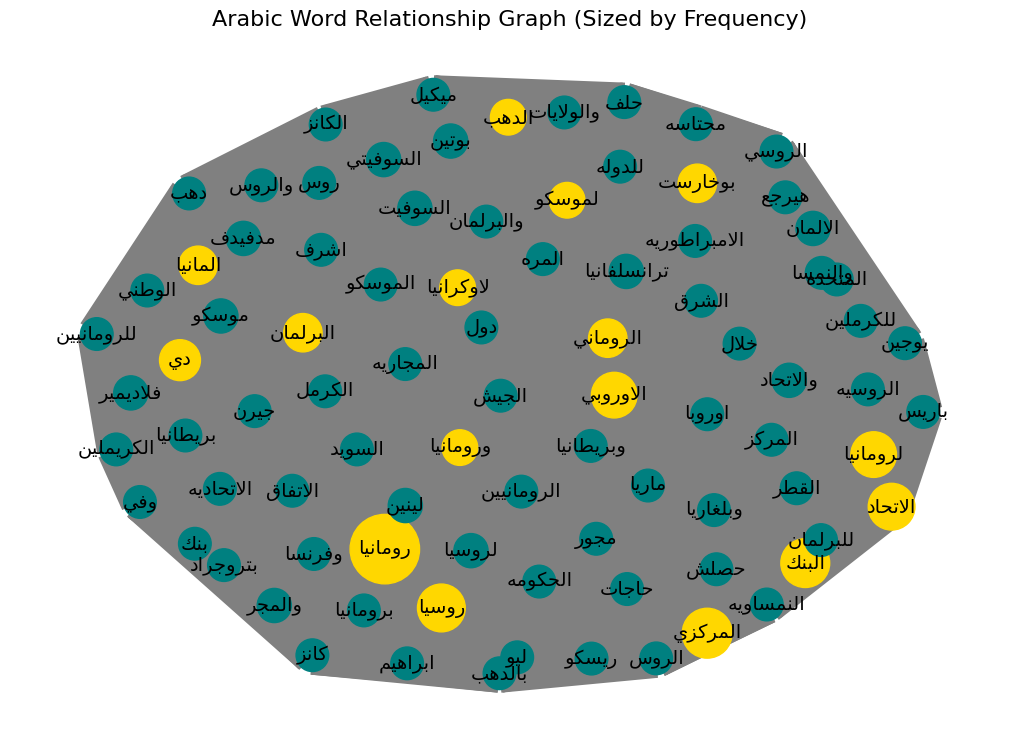

In [87]:
import networkx as nx
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import itertools
from collections import Counter

def build_word_graph(words):
    """Builds a co-occurrence graph from a list of Arabic words with frequency scaling."""
    G = nx.Graph()

    # Count word frequencies
    word_freq = Counter(words)

    # Create word pairs (co-occurrence)
    word_pairs = list(itertools.combinations(set(words), 2))
    G.add_edges_from(word_pairs)

    # Reshape Arabic words for correct display
    labels = {node: get_display(arabic_reshaper.reshape(node)) for node in G.nodes()}

    # Node sizes based on word frequency (higher frequency = larger node)
    max_freq = max(word_freq.values()) if word_freq else 1
    node_sizes = [((word_freq[node] / max_freq) * 2000) + 500 for node in G.nodes()]  # Scale size

    # Node colors (highlight more frequent words)
    node_colors = ["gold" if word_freq[node] > 2 else "teal" for node in G.nodes()]

    # Edge thickness based on word co-occurrence strength
    edge_widths = [2 + (G.degree(edge[0]) * 0.3) for edge in G.edges()]

    # Layout for better visualization
    pos = nx.spring_layout(G, seed=42)

    # Draw network
    plt.figure(figsize=(10, 7))
    nx.draw(
        G, pos, with_labels=True, labels=labels,
        node_size=node_sizes, node_color=node_colors,
        edge_color="gray", width=edge_widths,
        font_size=14, font_family="sans-serif"  # Fix font issue
    )

    # Title
    plt.title("Arabic Word Relationship Graph (Sized by Frequency)", fontsize=16)

    # Save as image
    plt.savefig("arabic_word_graph.png", dpi=300, bbox_inches='tight')

    # Show graph
    plt.show()


# Example usage: Replace with your word list
build_word_graph(named_entities_in_docs)


# Calculate Tf-idf

In [89]:
import os
import math
from collections import defaultdict

# Function to read text files and generate word counts and document frequencies
def give_path(folder_path):
    """
    Reads all text files in a given folder and returns:
    - dic: {file_name: {word: count}} (all words)
    - dic_entities: {file_name: {named_entity: count}} (only named entities)
    - freq: {word: count_in_all_files} (document frequency)
    - file_count: Total number of files processed
    """
    dic = {}
    dic_entities = {}
    dic_boosted = {}
    dic_top_words = {}
    freq = defaultdict(int)
    file_names = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.txt')]
    count =0
    for file in file_names:
        if(count >11):
          break
        count += 1
        name = os.path.basename(file)
        with open(file, 'r', encoding="utf-8", errors='ignore') as f:
            data = f.read()
            words = process_text(data)
            ner_text = recognize(data)
            named_entities = retrieveNamedEntities(ner_text)

        word_count = defaultdict(int)
        boosted_word_count = defaultdict(int)
        word_count_entities = defaultdict(int)
        wordsList = words.split()

        for word in wordsList:
            word_count[word] += 1

        for word in named_entities:
            word_count_entities[word] += 1
            boosted_word_count[word] +=5 #boosting factor


        dic[name] = word_count
        dic_boosted[name] = boosted_word_count
        dic_entities[name] = word_count_entities

        for word in word_count:
            freq[word] += 1  # Count document frequency of each word

        # Select top 20 words by frequency
        sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:20]
        dic_top_words[name] = {word: count for word, count in sorted_words}
        dic_top_words[name].update(word_count_entities)  # Add named entities

    return dic, dic_boosted, dic_entities, dic_top_words, freq, len(file_names)  # Return file count as well


def compute_tfidf(dic, freq, num_docs):
    """Computes TF-IDF for the processed text files."""
    tfidf = {}

    for file, word_counts in dic.items():
        tfidf[file] = {}
        for word, count in word_counts.items():
            tf = count / sum(word_counts.values())  # Term frequency
            idf = math.log(num_docs / (1 + freq[word]))  # Inverse document frequency
            tfidf[file][word] = tf * idf

    return tfidf


# Main script execution
base_path = "raw_data"
dic = {}  # Stores word frequency per file
dic_entiies = {}
dic_boosted = {}
dic_top_words = {}
freq = defaultdict(int)  # Stores document frequency of words

# Get dictionaries and total documents
dic, dic_boosted, dic_entities, dic_top_words, folder_freq, total_docs = give_path(base_path)
for word, count in folder_freq.items():
    freq[word] += count  # Aggregate word frequencies

# Compute TF-IDF
tfidf = compute_tfidf(dic, freq, total_docs)
tfidf_values = []

# Flatten the tfidf dictionary and collect (word, score) pairs
for file, word_scores in tfidf.items():
    for word, score in word_scores.items():
        tfidf_values.append((word, score))

# Sort by TF-IDF score in descending order
tfidf_values.sort(key=lambda x: x[1], reverse=True)

# Print the top 30 words with their TF-IDF scores
top_30_words = tfidf_values[:30]
print("Top 30 words based on TF-IDF:")
for word, score in top_30_words:
    print(f"{word}: {score:.4f}")

for file_name, word_counts in dic.items():
    # Sort words by frequency in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_10_words = sorted_word_counts[:10]  # Get top 10 words

    # Print results
    print(f"Top 10 frequent words in the file '{file_name}':")
    for word, count in top_10_words:
        print(f"{word}: {count}")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 30 words based on TF-IDF:
تصنيف: 0.1985
روماني: 0.1894
تويتر: 0.1842
رومانيا: 0.1762
ماسك: 0.1688
نهر: 0.1558
إسرائيلي: 0.1452
فرنسي: 0.1399
سودان: 0.1310
ميناء: 0.1305
ذهب: 0.1299
تشادي: 0.1296
ائتماني: 0.1264
صومال: 0.1139
تسلا: 0.1130
ماسك: 0.1059
صومالي: 0.1029
نفط: 0.1003
سوداني: 0.0972
إكس: 0.0943
مليار: 0.0936
تشاد: 0.0877
تويتر: 0.0876
دولة: 0.0873
شرك: 0.0835
منسوب: 0.0835
حب: 0.0817
ألمانيا: 0.0805
اسرائيلي: 0.0794
أوكرانيا: 0.0779
Top 10 frequent words in the file 'المخبر_الاقتصادي__ماذا_سيفعل_بوتين_في_كنز_الذهب_الذي_استولت_عليه_روسيا_هل_يرده_لأصحابه.txt':
روماني: 57
رومانيا: 53
بنك: 24
روسي: 23
كنز: 22
سن: 19
اتحاد: 17
مركزي: 17
أوربي: 15
روسيا: 15
Top 10 frequent words in the file 'المخبر_الاقتصادي__كيف_يضرب_الحوثيون_في_اليمن_أضعف_نقطة_في_اقتصاد_إسرائيل.txt':
ميناء: 51
إسرائيلي: 50
اسرائيلي: 25
سفينة: 22
بحر: 22
حوثي: 19
شرك: 19
شحن: 18
نفط: 16
يوم: 12
Top 10 frequent words in the file 'المخبر_الاقتصادي__لماذا_يخاف_إيلون_ماسك_من_إفلاس_تويتر_قريبا_ولماذا_يطرد_الموظفين.t

# Visualize TF-IDF scores


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


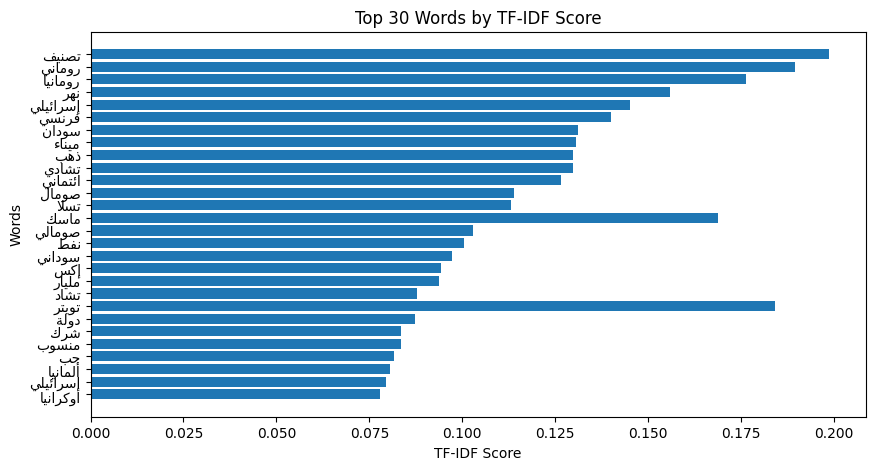

In [111]:
import arabic_reshaper
from bidi.algorithm import get_display
reshaped_words = [get_display(arabic_reshaper.reshape(word)) for word, _ in top_30_words]
scores = [score for _, score in top_30_words]

plt.figure(figsize=(10, 5))
plt.barh(reshaped_words[::-1], scores[::-1])
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("Top 30 Words by TF-IDF Score")

plt.rcParams["font.family"] = "DejaVu Sans"
plt.show()


# Vector Space Model

In [91]:
# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    mag_vec1 = math.sqrt(sum(a * a for a in vec1))
    mag_vec2 = math.sqrt(sum(b * b for b in vec2))
    print(f"Vector 1: {vec1}")
    print(f"Vector 2: {vec2}")
    print(f"Dot product: {dot_product}")
    print(f"Magnitude 1: {mag_vec1}, Magnitude 2: {mag_vec2}")

    if mag_vec1 == 0 or mag_vec2 == 0:
        return 0.0
    return dot_product / (mag_vec1 * mag_vec2)


def vectorSpaceModel(query, doc_dict, tfidf_scr):
    query_vocab = query.split(" ")

    query_vector = []
    for word in query_vocab:
        word_score = sum(tfidf_scr[file].get(word, 0) for file in tfidf_scr)  # Aggregate scores
        query_vector.append(word_score)

    if not any(query_vector):
        return []

    print(f"Query vector: {query_vector}")  # Debugging

    similarity_scores = []

    for doc_id, doc in doc_dict.items():
        # Create document vector
        doc_vector = [tfidf_scr[doc_id].get(word, 0) for word in query_vocab]

        # if not any(doc_vector):  # Skip empty document vectors
        #     continue

        print(f"Document {doc_id} vector: {doc_vector}")

        # Calculate cosine similarity
        similarity = cosine_similarity(query_vector, doc_vector)
        similarity_scores.append((doc_id, similarity))

    # Sort documents by similarity score
    similarity_scores.sort(key=lambda x: x[1], reverse=True)

    return similarity_scores[:5]  # Return top 5 documents


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
# Example query
query = "كوريا"
# Get the top 5 documents based on cosine similarity
top_5_docs = vectorSpaceModel(query, dic, tfidf)

# Output the top 5 documents
print("Top 5 documents:")
for doc_id, score in top_5_docs:
    print(f"Document: {doc_id} with similarity score: {score:.4f}")



Query vector: [0.00481334873648648]
Document المخبر_الاقتصادي__ماذا_سيفعل_بوتين_في_كنز_الذهب_الذي_استولت_عليه_روسيا_هل_يرده_لأصحابه.txt vector: [0]
Vector 1: [0.00481334873648648]
Vector 2: [0]
Dot product: 0.0
Magnitude 1: 0.00481334873648648, Magnitude 2: 0.0
Document المخبر_الاقتصادي__كيف_يضرب_الحوثيون_في_اليمن_أضعف_نقطة_في_اقتصاد_إسرائيل.txt vector: [0]
Vector 1: [0.00481334873648648]
Vector 2: [0]
Dot product: 0.0
Magnitude 1: 0.00481334873648648, Magnitude 2: 0.0
Document المخبر_الاقتصادي__لماذا_يخاف_إيلون_ماسك_من_إفلاس_تويتر_قريبا_ولماذا_يطرد_الموظفين.txt vector: [0]
Vector 1: [0.00481334873648648]
Vector 2: [0]
Dot product: 0.0
Magnitude 1: 0.00481334873648648, Magnitude 2: 0.0
Document المخبر_الاقتصادي__لماذا_قتلت_روسيا_اتفاقية_الحبوب_هل_ترضخ_أمريكا_وأوروبا_لشروط_بوتين.txt vector: [0]
Vector 1: [0.00481334873648648]
Vector 2: [0]
Dot product: 0.0
Magnitude 1: 0.00481334873648648, Magnitude 2: 0.0
Document المخبر_الاقتصادي__من_دمر_السودان_وجوع_أهله_من_يقف_وراء_أكبر_أزمة_جوع_في_

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Perform LDA Topic Modeling

In [107]:
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from gensim import corpora, models

plt.rcParams["font.family"] = "DejaVu Sans"  # Ensure proper Arabic font

# Perform LDA topic modeling
def perform_lda(dic):
    processed_docs = [list(word_counts.keys()) for word_counts in dic.values()]

    # Create dictionary and corpus
    dictionary = corpora.Dictionary(processed_docs)
    corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

    # Train LDA model with 6 topics
    lda_model = models.LdaModel(corpus, num_topics=6, id2word=dictionary, passes=10, random_state=46)

    # Extract topics without formatting
    topics = lda_model.show_topics(num_words=10, formatted=False)

    print("\nLDA Topics:")
    for topic in topics:
        print(topic)

    # Loop through topics and visualize
    for topic_idx, words in topics:
        # Reshape Arabic words for correct display
        reshaped_words = [get_display(arabic_reshaper.reshape(word)) for word, _ in words]

        # Convert to DataFrame
        words_df = pd.DataFrame(words, columns=["Word", "Weight"])
        words_df["Word"] = reshaped_words  # Replace words with reshaped Arabic text

        # Plot topic word distribution
        plt.figure(figsize=(8, 5))
        sns.barplot(x="Weight", y="Word", data=words_df, palette="viridis")
        plt.title(f"(Topic {topic_idx + 1})", fontsize=14)
        plt.xlabel("(Word Importance)", fontsize=12)
        plt.ylabel("(Words)", fontsize=12)
        plt.show()

    return lda_model, dictionary, corpus


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
lda_model, dictionary, corpus = perform_lda(dic)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



LDA Topics:
(0, '0.001*"إطار" + 0.001*"كتير" + 0.001*"صاحب" + 0.001*"معلوم" + 0.001*"7" + 0.001*"طلع" + 0.001*"إبراهيم" + 0.001*"زياد" + 0.001*"تقريب" + 0.001*"موجود"')
(1, '0.001*"سبب" + 0.001*"خوف" + 0.001*"كتب" + 0.001*"فات" + 0.001*"ظهر" + 0.001*"أكتوبر" + 0.001*"حقيق" + 0.001*"احتمال" + 0.001*"موتورز" + 0.001*"وحيد"')
(2, '0.001*"ملك" + 0.001*"فضل" + 0.001*"قدر" + 0.001*"رد" + 0.001*"كبير" + 0.001*"يشوف" + 0.001*"مر" + 0.001*"طرف" + 0.001*"أرض" + 0.001*"جزء"')
(3, '0.001*"وارد" + 0.001*"نظر" + 0.001*"تعليق" + 0.001*"علشان" + 0.001*"27" + 0.001*"زي" + 0.001*"قيمة" + 0.001*"مجلس" + 0.001*"سؤال" + 0.001*"أكبر"')
(4, '0.001*"بساط" + 0.001*"2021" + 0.001*"221" + 0.001*"تنفيذي" + 0.001*"طبيعي" + 0.001*"مجموع" + 0.001*"دخل" + 0.001*"مايو" + 0.001*"خفض" + 0.001*"مزيف"')
(5, '0.001*"مفروض" + 0.001*"مهم" + 0.001*"يوم" + 0.001*"مش" + 0.001*"محتوى" + 0.001*"أحد" + 0.001*"وحيد" + 0.001*"10" + 0.001*"هدف" + 0.001*"طرف"')


# Enhancing Topic Modelling with NER

*   Option 1: Use only Named Entities




/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



LDA Topics:
(0, [('المتحدة', 0.0052039498), ('إبراهيم', 0.00520149), ('PLUS', 0.005197167), ('بكين', 0.0051920414), ('الشمال', 0.0051915385), ('المملكة', 0.005190987), ('أشرف', 0.0051903394), ('غيرهارد', 0.0051900167), ('الخليج', 0.0051894654), ('العربي', 0.005188138)])
(1, [('دي', 0.010734757), ('ابراهيم', 0.010734433), ('البنك', 0.010728378), ('المتحده', 0.010726951), ('سلام', 0.0081670545), ('اشرف', 0.008157929), ('روسيا', 0.008157573), ('بلس', 0.008157325), ('الامم', 0.008153281), ('الحكومه', 0.008150552)])
(2, [('سلام', 0.008349134), ('الشمال', 0.008278725), ('ستريم', 0.008270112), ('الولايات', 0.0045324573), ('دي', 0.0045298086), ('امريكا', 0.0045084553), ('أوروبا', 0.0044937637), ('دا', 0.0044932854), ('غزه', 0.004492604), ('الحكومه', 0.00449225)])
(3, [('دي', 0.006148617), ('النهار', 0.0061352067), ('سلام', 0.006133655), ('سنة', 0.006130413), ('إبراهيم', 0.006130016), ('PLUS', 0.006129972), ('البنك', 0.0061295363), ('السنة', 0.00612894), ('الدولي', 0.0061245277), ('الاتفاق', 0

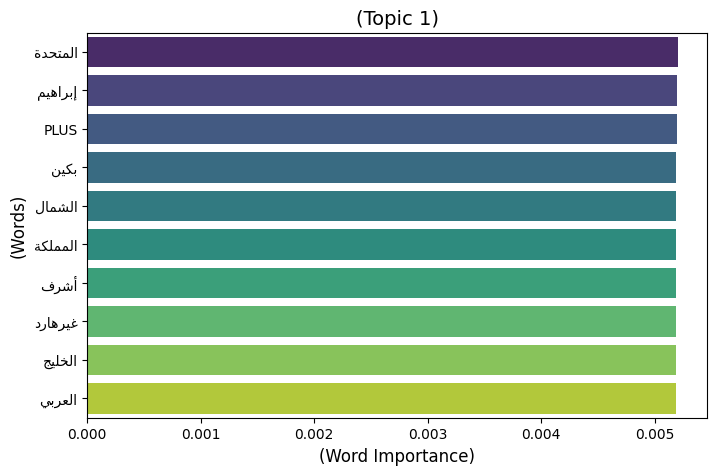

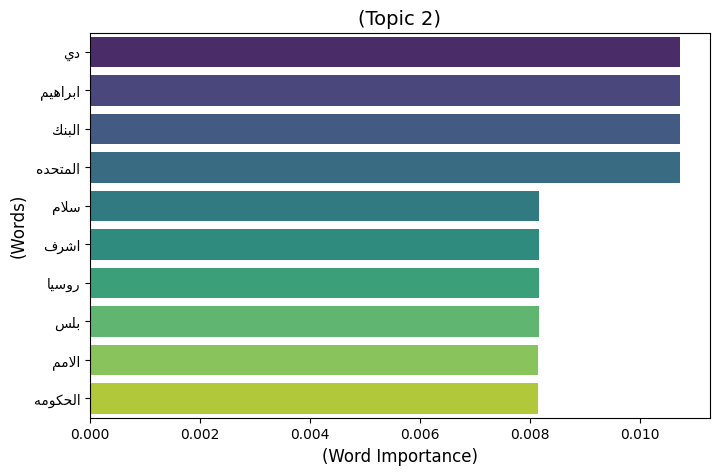

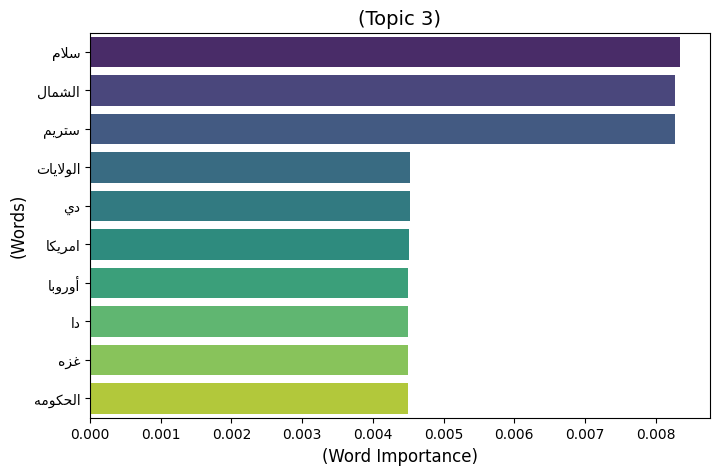

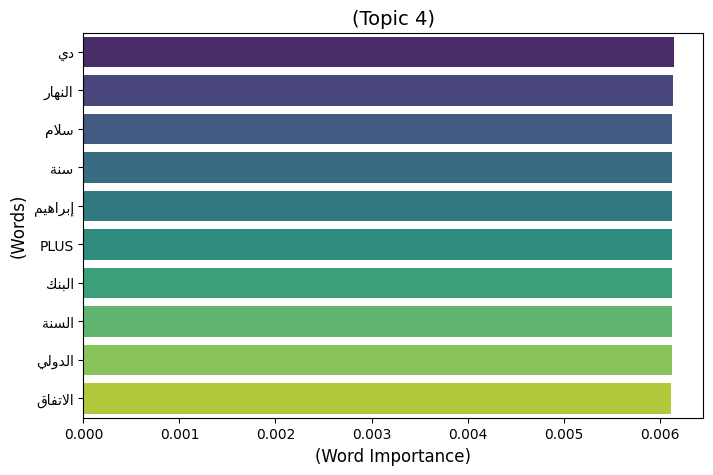

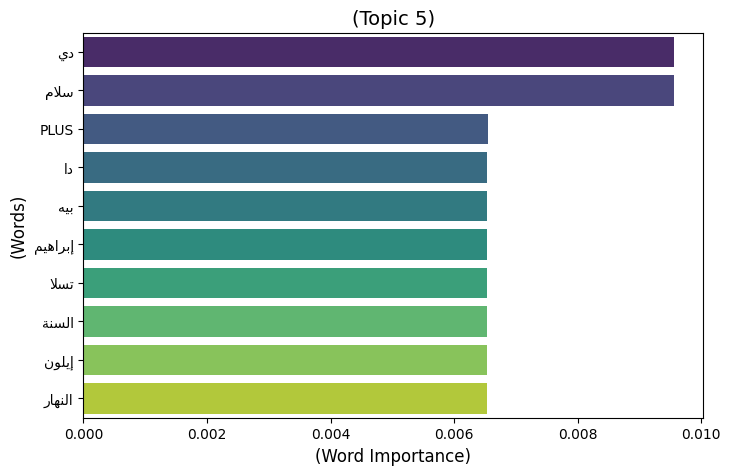

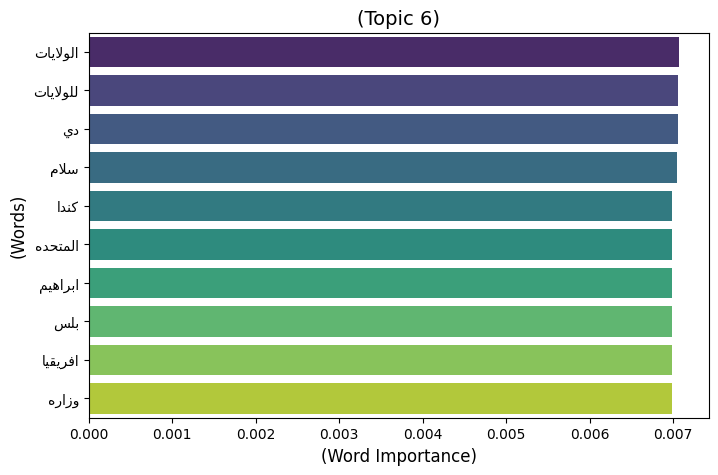

In [109]:
lda_model, dictionary, corpus = perform_lda(dic_entities)


*   Option 2: Boost Named Entities


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



LDA Topics:
(0, [('المتحدة', 0.0052039498), ('إبراهيم', 0.00520149), ('PLUS', 0.005197167), ('بكين', 0.0051920414), ('الشمال', 0.0051915385), ('المملكة', 0.005190987), ('أشرف', 0.0051903394), ('غيرهارد', 0.0051900167), ('الخليج', 0.0051894654), ('العربي', 0.005188138)])
(1, [('دي', 0.010734757), ('ابراهيم', 0.010734433), ('البنك', 0.010728378), ('المتحده', 0.010726951), ('سلام', 0.0081670545), ('اشرف', 0.008157929), ('روسيا', 0.008157573), ('بلس', 0.008157325), ('الامم', 0.008153281), ('الحكومه', 0.008150552)])
(2, [('سلام', 0.008349134), ('الشمال', 0.008278725), ('ستريم', 0.008270112), ('الولايات', 0.0045324573), ('دي', 0.0045298086), ('امريكا', 0.0045084553), ('أوروبا', 0.0044937637), ('دا', 0.0044932854), ('غزه', 0.004492604), ('الحكومه', 0.00449225)])
(3, [('دي', 0.006148617), ('النهار', 0.0061352067), ('سلام', 0.006133655), ('سنة', 0.006130413), ('إبراهيم', 0.006130016), ('PLUS', 0.006129972), ('البنك', 0.0061295363), ('السنة', 0.00612894), ('الدولي', 0.0061245277), ('الاتفاق', 0

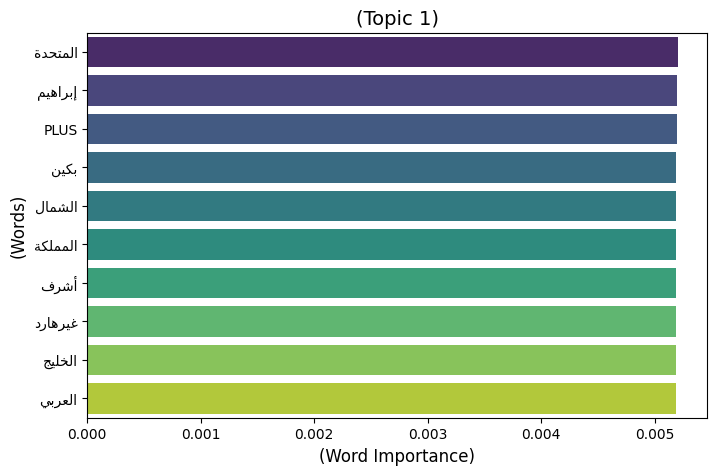

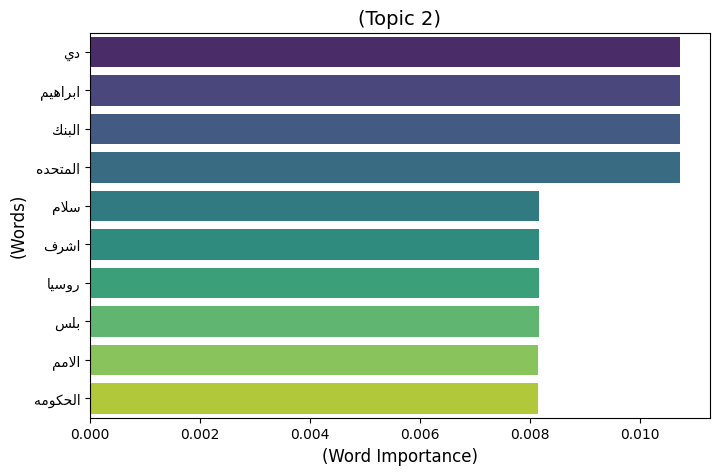

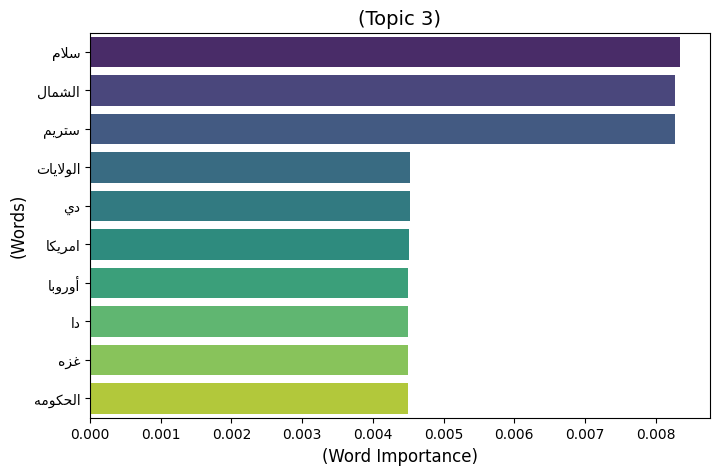

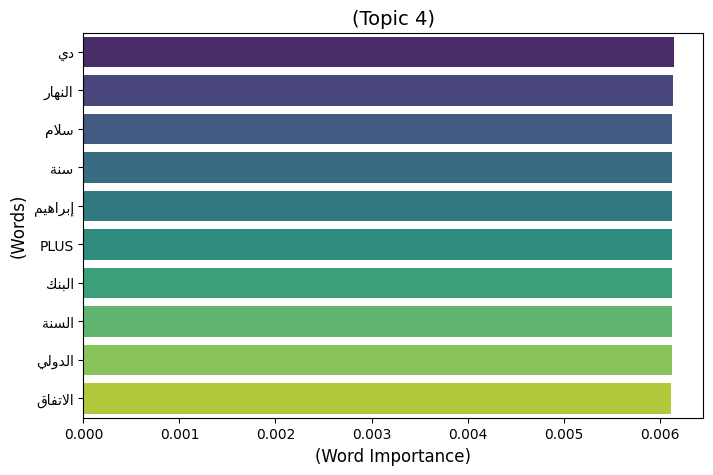

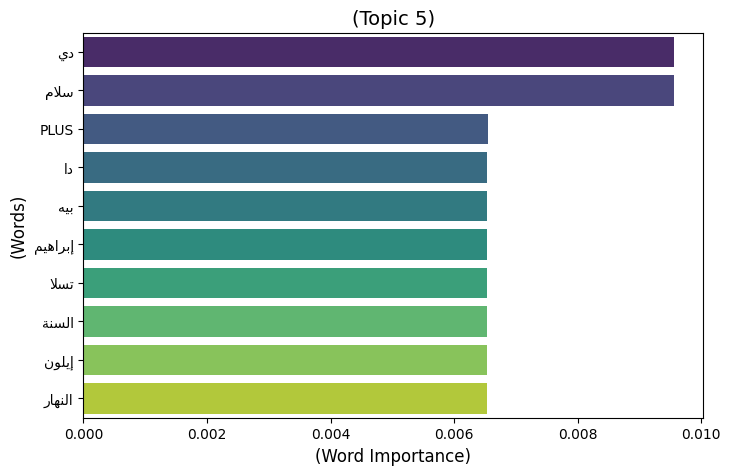

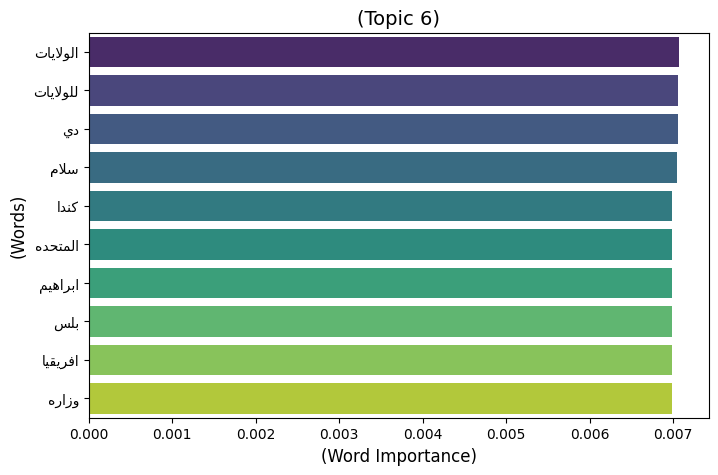

In [110]:
lda_model, dictionary, corpus = perform_lda(dic_boosted)

- Option3: Entities with top 20 words (highest frequency) and entity extracted words





/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



LDA Topics:
(0, [('مش', 0.005682083), ('سن', 0.0056820433), ('سنة', 0.005681847), ('ود', 0.005680111), ('أوروبا', 0.005680038), ('سلام', 0.005679144), ('PLUS', 0.005676054), ('إبراهيم', 0.005670745), ('دا', 0.005669957), ('النهار', 0.0056689326)])
(1, [('الحكومه', 0.0072675175), ('المتحده', 0.0072598425), ('اوروبا', 0.0072593084), ('سلام', 0.004991466), ('البنك', 0.004989761), ('حال', 0.004986328), ('ابراهيم', 0.004985622), ('دي', 0.004984765), ('سن', 0.0049838633), ('الدهب', 0.0049797907)])
(2, [('مش', 0.007211642), ('سلام', 0.0072055706), ('دي', 0.00719009), ('علشان', 0.004944553), ('يوم', 0.004940056), ('اوكرانيا', 0.004937582), ('والامم', 0.0049323854), ('روسيا', 0.0049322606), ('ناس', 0.0049319332), ('بي', 0.0049317186)])
(3, [('دي', 0.008640852), ('سن', 0.00863231), ('سلام', 0.008613396), ('شرك', 0.008549755), ('دولة', 0.0059407963), ('جد', 0.0058920877), ('ود', 0.0058828704), ('مش', 0.0058780354), ('حد', 0.0058589885), ('السنة', 0.0058549847)])
(4, [('دولة', 0.0061932583), ('اب

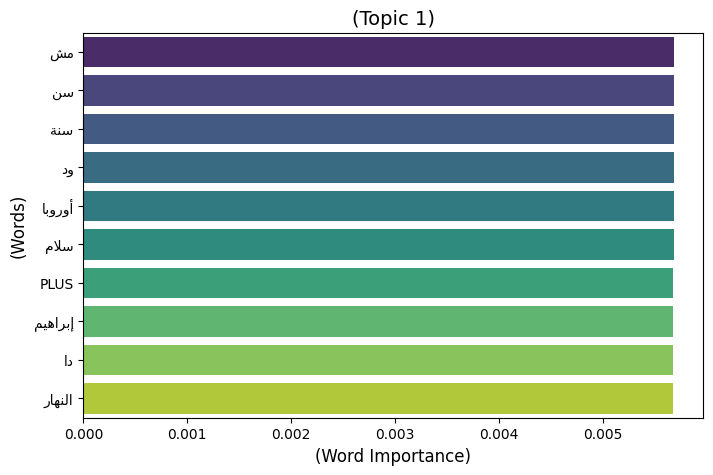

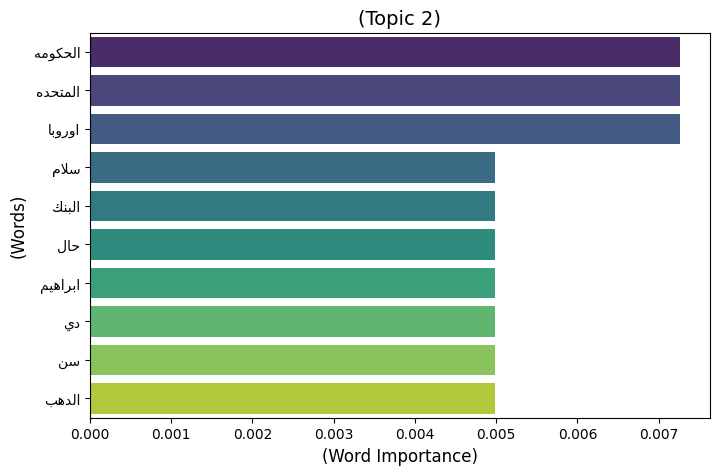

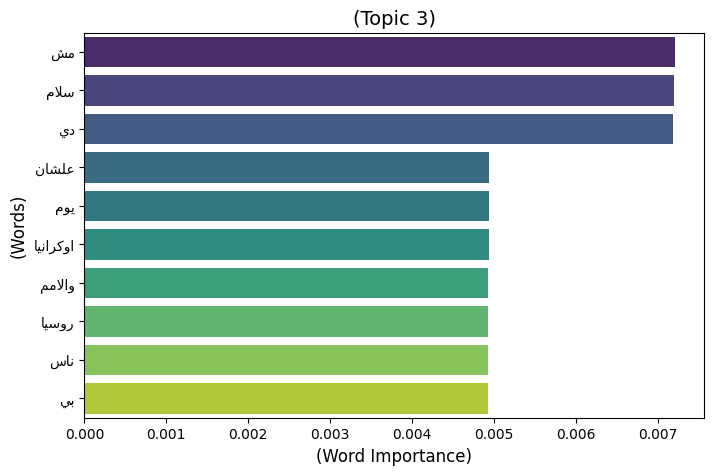

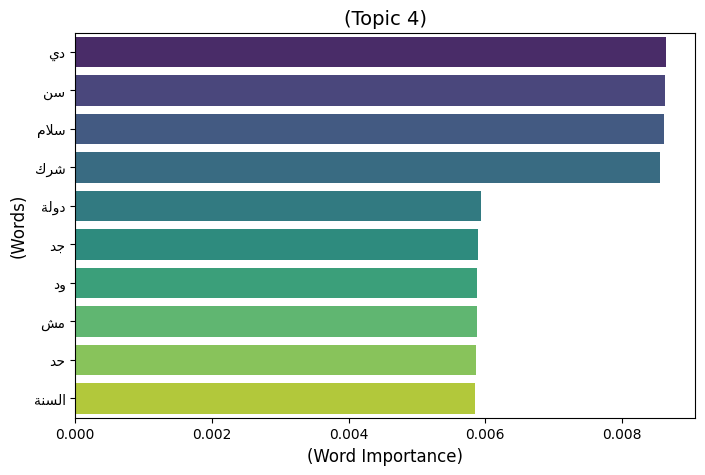

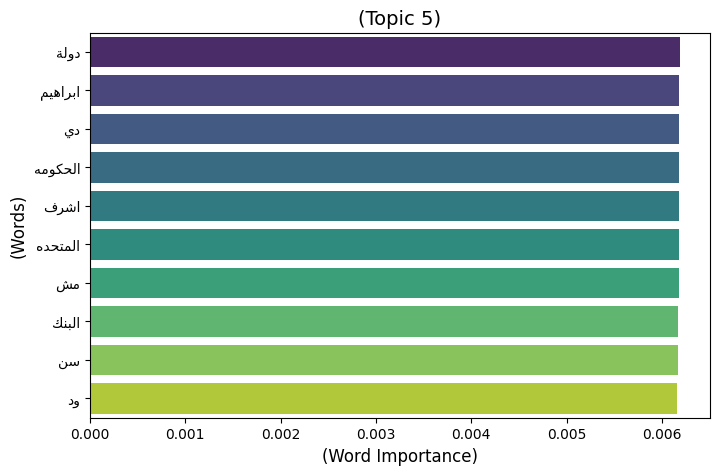

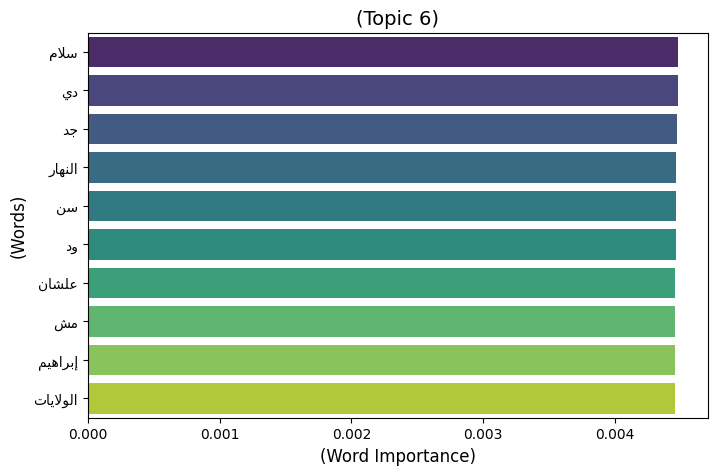

In [108]:
lda_model, dictionary, corpus = perform_lda(dic_top_words)